In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

## 1. Preprocessing

## Exploring data

In [2]:
df=pd.read_csv('/content/dataset.csv')

In [3]:
df

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [4]:
len(df)

44453

In [5]:
df.count()

COUGH                   44453
MUSCLE_ACHES            44453
TIREDNESS               44453
SORE_THROAT             44453
RUNNY_NOSE              44453
STUFFY_NOSE             44453
FEVER                   44453
NAUSEA                  44453
VOMITING                44453
DIARRHEA                44453
SHORTNESS_OF_BREATH     44453
DIFFICULTY_BREATHING    44453
LOSS_OF_TASTE           44453
LOSS_OF_SMELL           44453
ITCHY_NOSE              44453
ITCHY_EYES              44453
ITCHY_MOUTH             44453
ITCHY_INNER_EAR         44453
SNEEZING                44453
PINK_EYE                44453
TYPE                    44453
dtype: int64

In [6]:
df.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
COUGH,44453.0,0.520662,0.499579,0.0,0.0,1.0,1.0,1.0
MUSCLE_ACHES,44453.0,0.519762,0.499615,0.0,0.0,1.0,1.0,1.0
TIREDNESS,44453.0,0.519897,0.499610,0.0,0.0,1.0,1.0,1.0
SORE_THROAT,44453.0,0.519358,0.499631,0.0,0.0,1.0,1.0,1.0
RUNNY_NOSE,44453.0,0.496232,0.499991,0.0,0.0,0.0,1.0,1.0
STUFFY_NOSE,44453.0,0.495850,0.499988,0.0,0.0,0.0,1.0,1.0
FEVER,44453.0,0.325400,0.468529,0.0,0.0,0.0,1.0,1.0
NAUSEA,44453.0,0.324253,0.468100,0.0,0.0,0.0,1.0,1.0
VOMITING,44453.0,0.324523,0.468201,0.0,0.0,0.0,1.0,1.0
DIARRHEA,44453.0,0.323465,0.467804,0.0,0.0,0.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [9]:
df.columns

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE', 'TYPE'],
      dtype='object')

## missing and null values

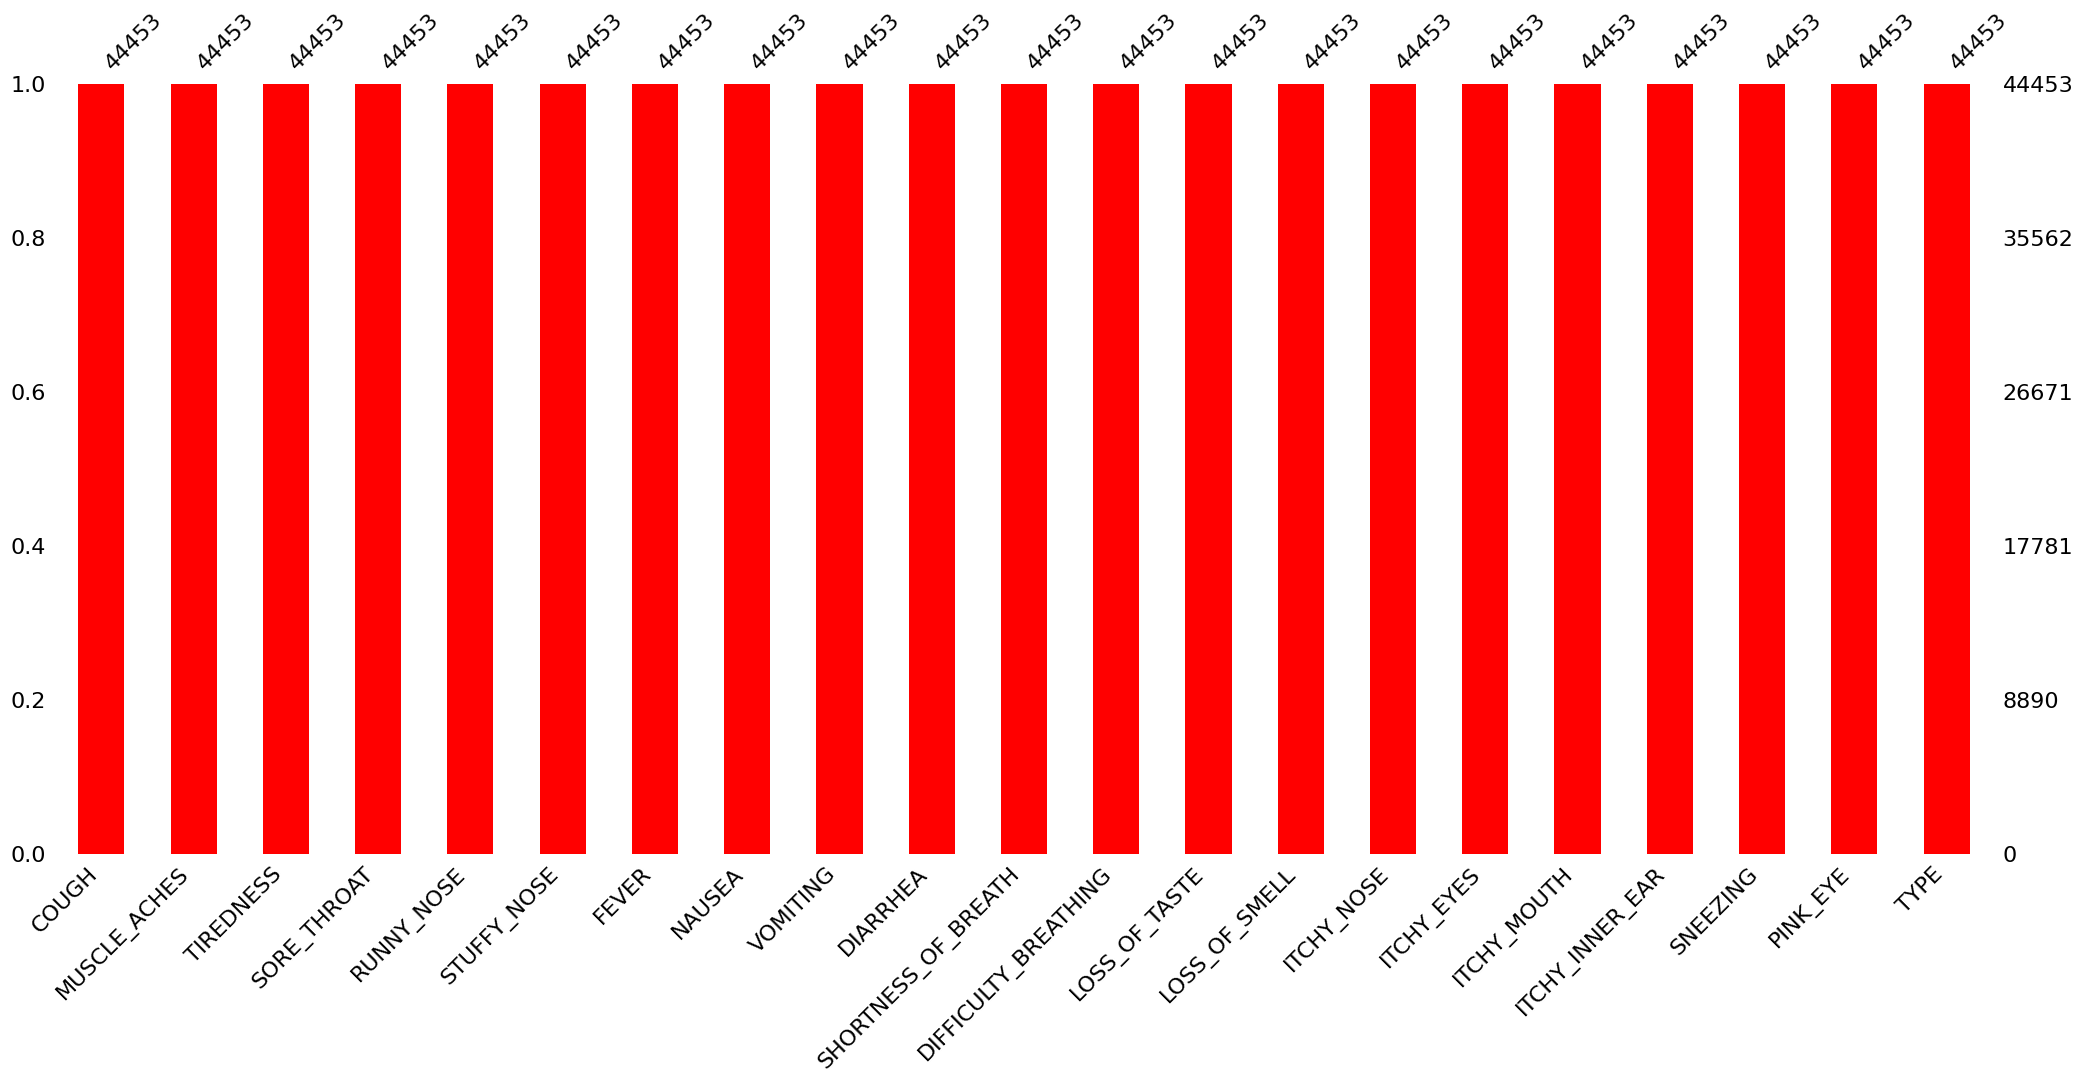

In [10]:
import missingno as msn
msn.bar(df,color="red");

In [11]:
df.isna()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44449,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44450,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44451,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].isna().value_counts())
    print("")
    print("")

COUGH
COUGH
False    44453
Name: count, dtype: int64


MUSCLE_ACHES
MUSCLE_ACHES
False    44453
Name: count, dtype: int64


TIREDNESS
TIREDNESS
False    44453
Name: count, dtype: int64


SORE_THROAT
SORE_THROAT
False    44453
Name: count, dtype: int64


RUNNY_NOSE
RUNNY_NOSE
False    44453
Name: count, dtype: int64


STUFFY_NOSE
STUFFY_NOSE
False    44453
Name: count, dtype: int64


FEVER
FEVER
False    44453
Name: count, dtype: int64


NAUSEA
NAUSEA
False    44453
Name: count, dtype: int64


VOMITING
VOMITING
False    44453
Name: count, dtype: int64


DIARRHEA
DIARRHEA
False    44453
Name: count, dtype: int64


SHORTNESS_OF_BREATH
SHORTNESS_OF_BREATH
False    44453
Name: count, dtype: int64


DIFFICULTY_BREATHING
DIFFICULTY_BREATHING
False    44453
Name: count, dtype: int64


LOSS_OF_TASTE
LOSS_OF_TASTE
False    44453
Name: count, dtype: int64


LOSS_OF_SMELL
LOSS_OF_SMELL
False    44453
Name: count, dtype: int64


ITCHY_NOSE
ITCHY_NOSE
False    44453
Name: count, dtype: int64


ITCHY

## counting features values

In [13]:
cols = df.columns
cols

for col in cols:
    print(col)
    print(df[col].value_counts())
    print("")
    print("")

COUGH
COUGH
1    23145
0    21308
Name: count, dtype: int64


MUSCLE_ACHES
MUSCLE_ACHES
1    23105
0    21348
Name: count, dtype: int64


TIREDNESS
TIREDNESS
1    23111
0    21342
Name: count, dtype: int64


SORE_THROAT
SORE_THROAT
1    23087
0    21366
Name: count, dtype: int64


RUNNY_NOSE
RUNNY_NOSE
0    22394
1    22059
Name: count, dtype: int64


STUFFY_NOSE
STUFFY_NOSE
0    22411
1    22042
Name: count, dtype: int64


FEVER
FEVER
0    29988
1    14465
Name: count, dtype: int64


NAUSEA
NAUSEA
0    30039
1    14414
Name: count, dtype: int64


VOMITING
VOMITING
0    30027
1    14426
Name: count, dtype: int64


DIARRHEA
DIARRHEA
0    30074
1    14379
Name: count, dtype: int64


SHORTNESS_OF_BREATH
SHORTNESS_OF_BREATH
0    30055
1    14398
Name: count, dtype: int64


DIFFICULTY_BREATHING
DIFFICULTY_BREATHING
0    30030
1    14423
Name: count, dtype: int64


LOSS_OF_TASTE
LOSS_OF_TASTE
0    25650
1    18803
Name: count, dtype: int64


LOSS_OF_SMELL
LOSS_OF_SMELL
0    25639
1    18814


### 1.4 duplicated

In [14]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44448    False
44449    False
44450    False
44451    False
44452    False
Length: 44453, dtype: bool

In [15]:
df.duplicated().value_counts()

False    44453
Name: count, dtype: int64

## plotting

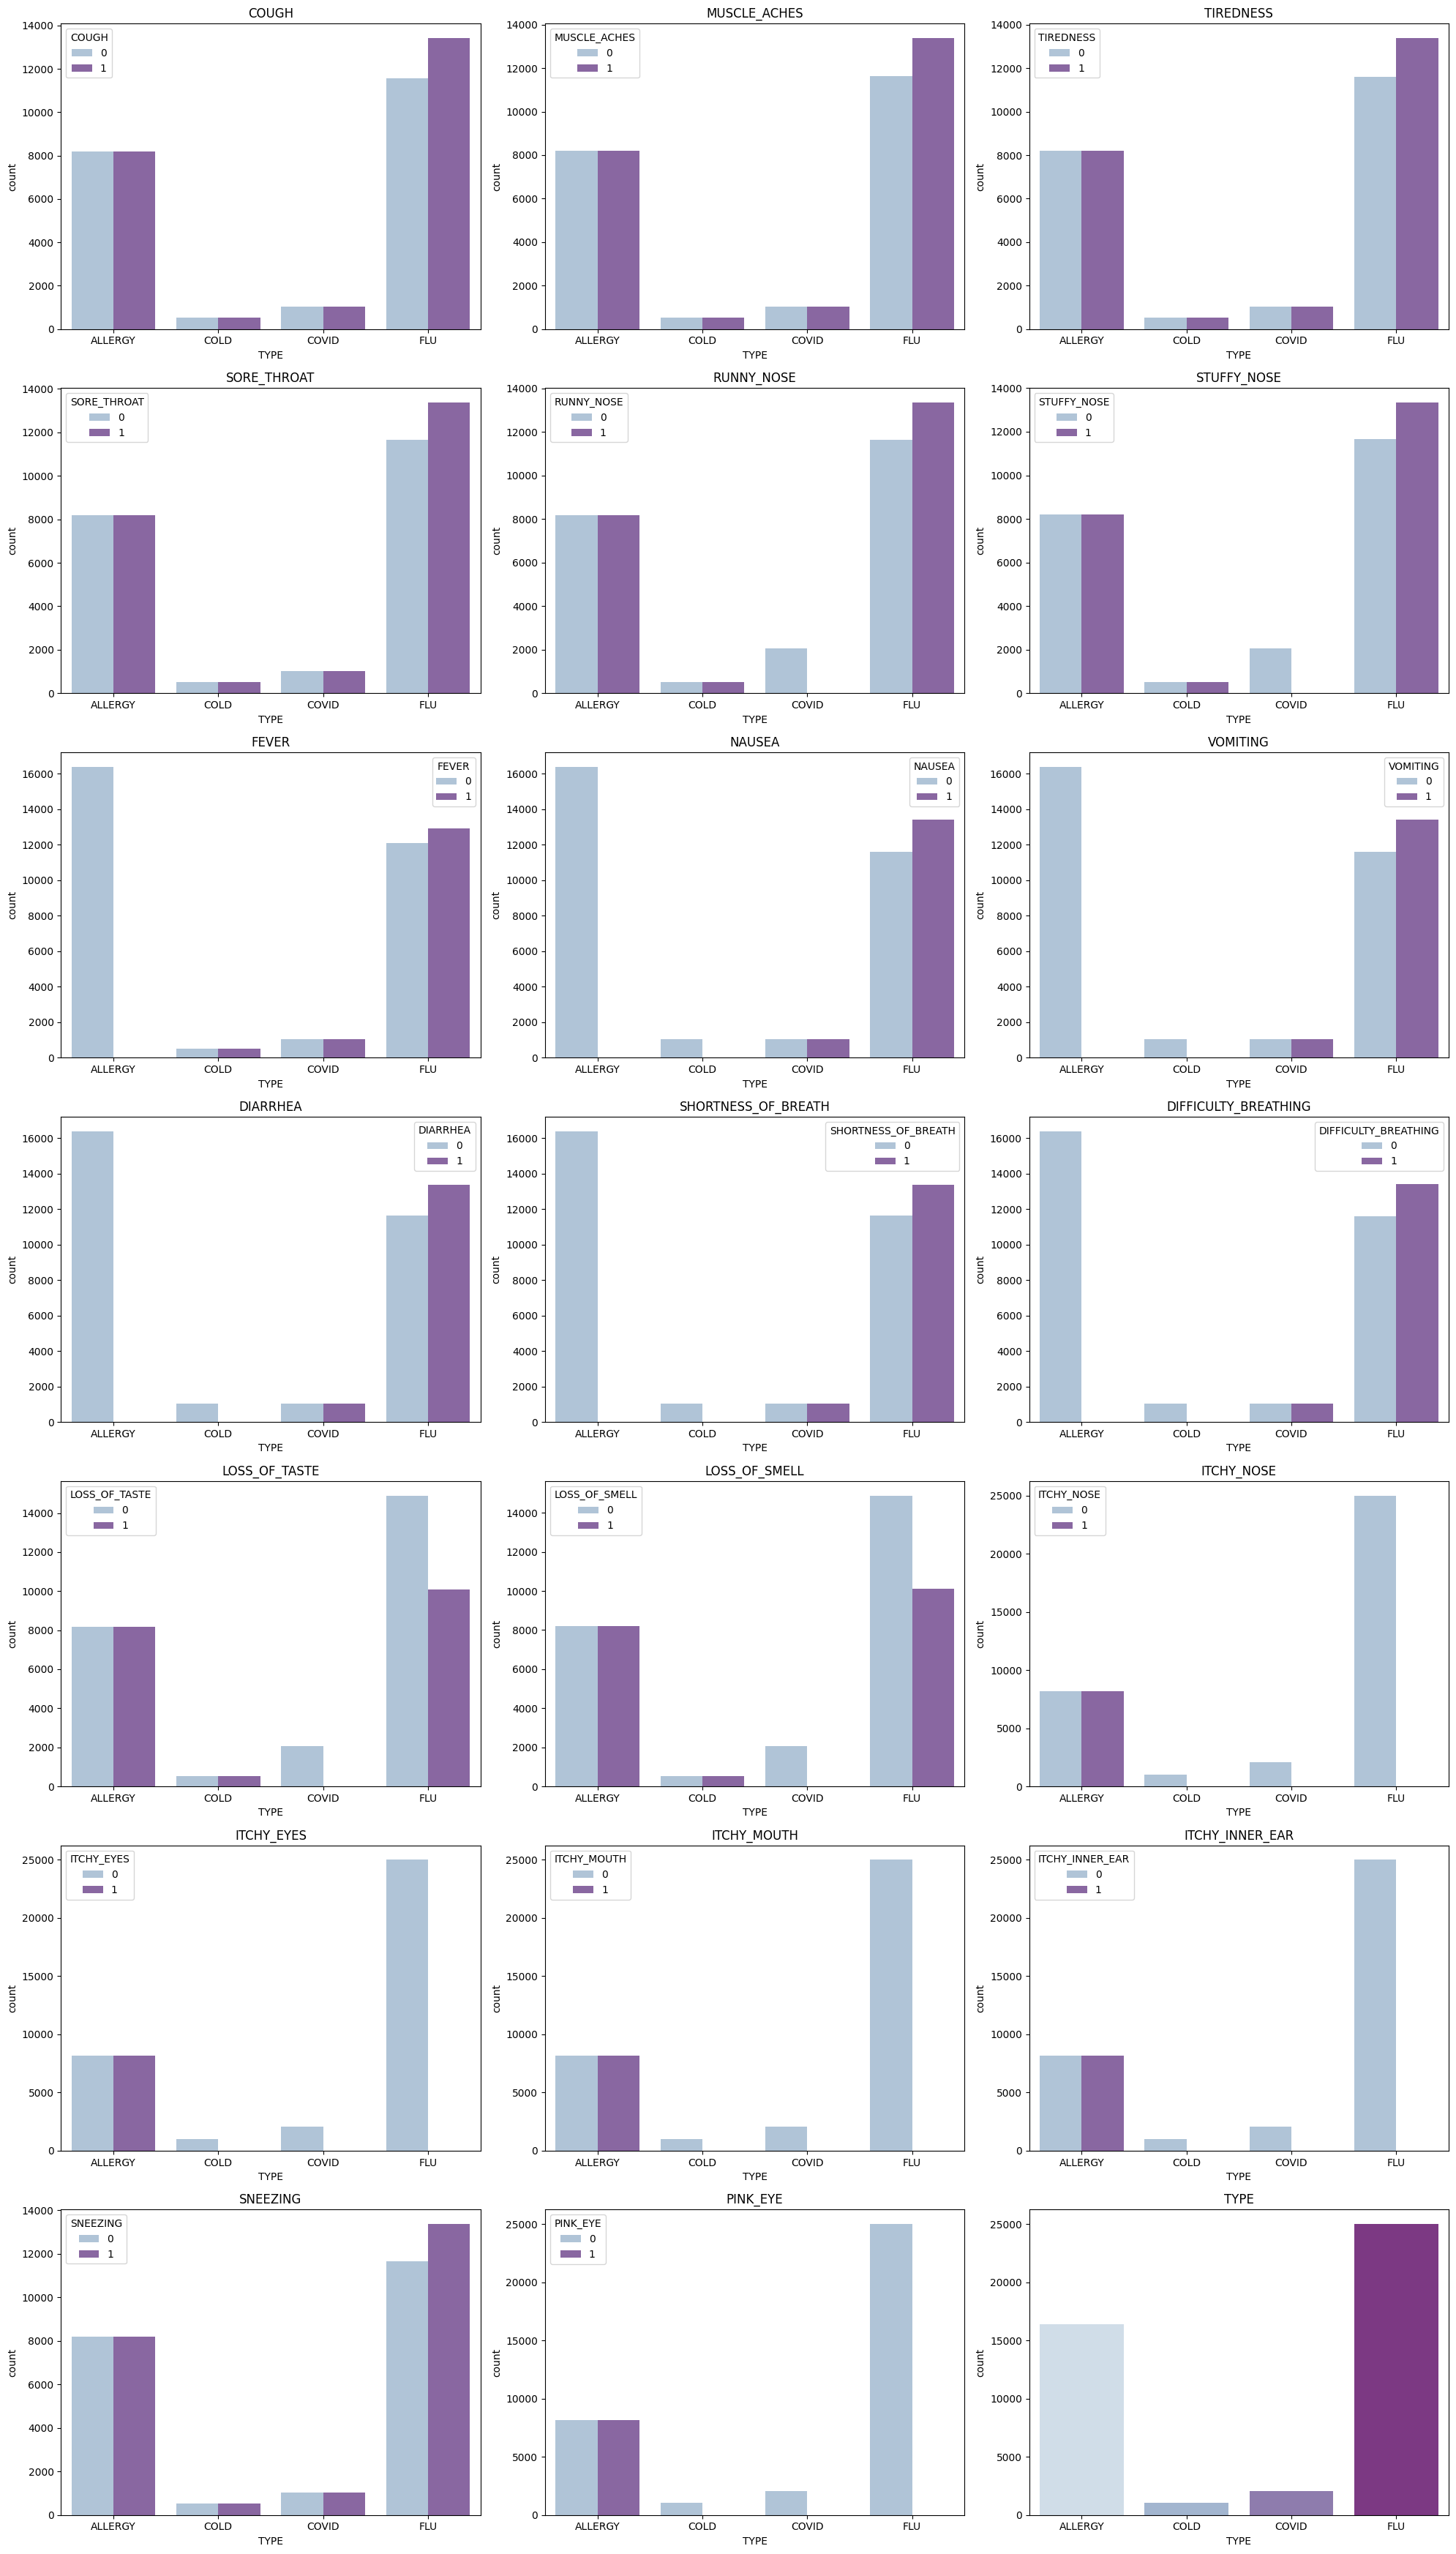

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cols = df.columns
num_cols = len(cols)

nrows = np.ceil(num_cols/3).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    # sns.countplot(x=col, data=df, ax=axes[i])
    sns.countplot(x='TYPE', data=df, hue=col, palette='BuPu',ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

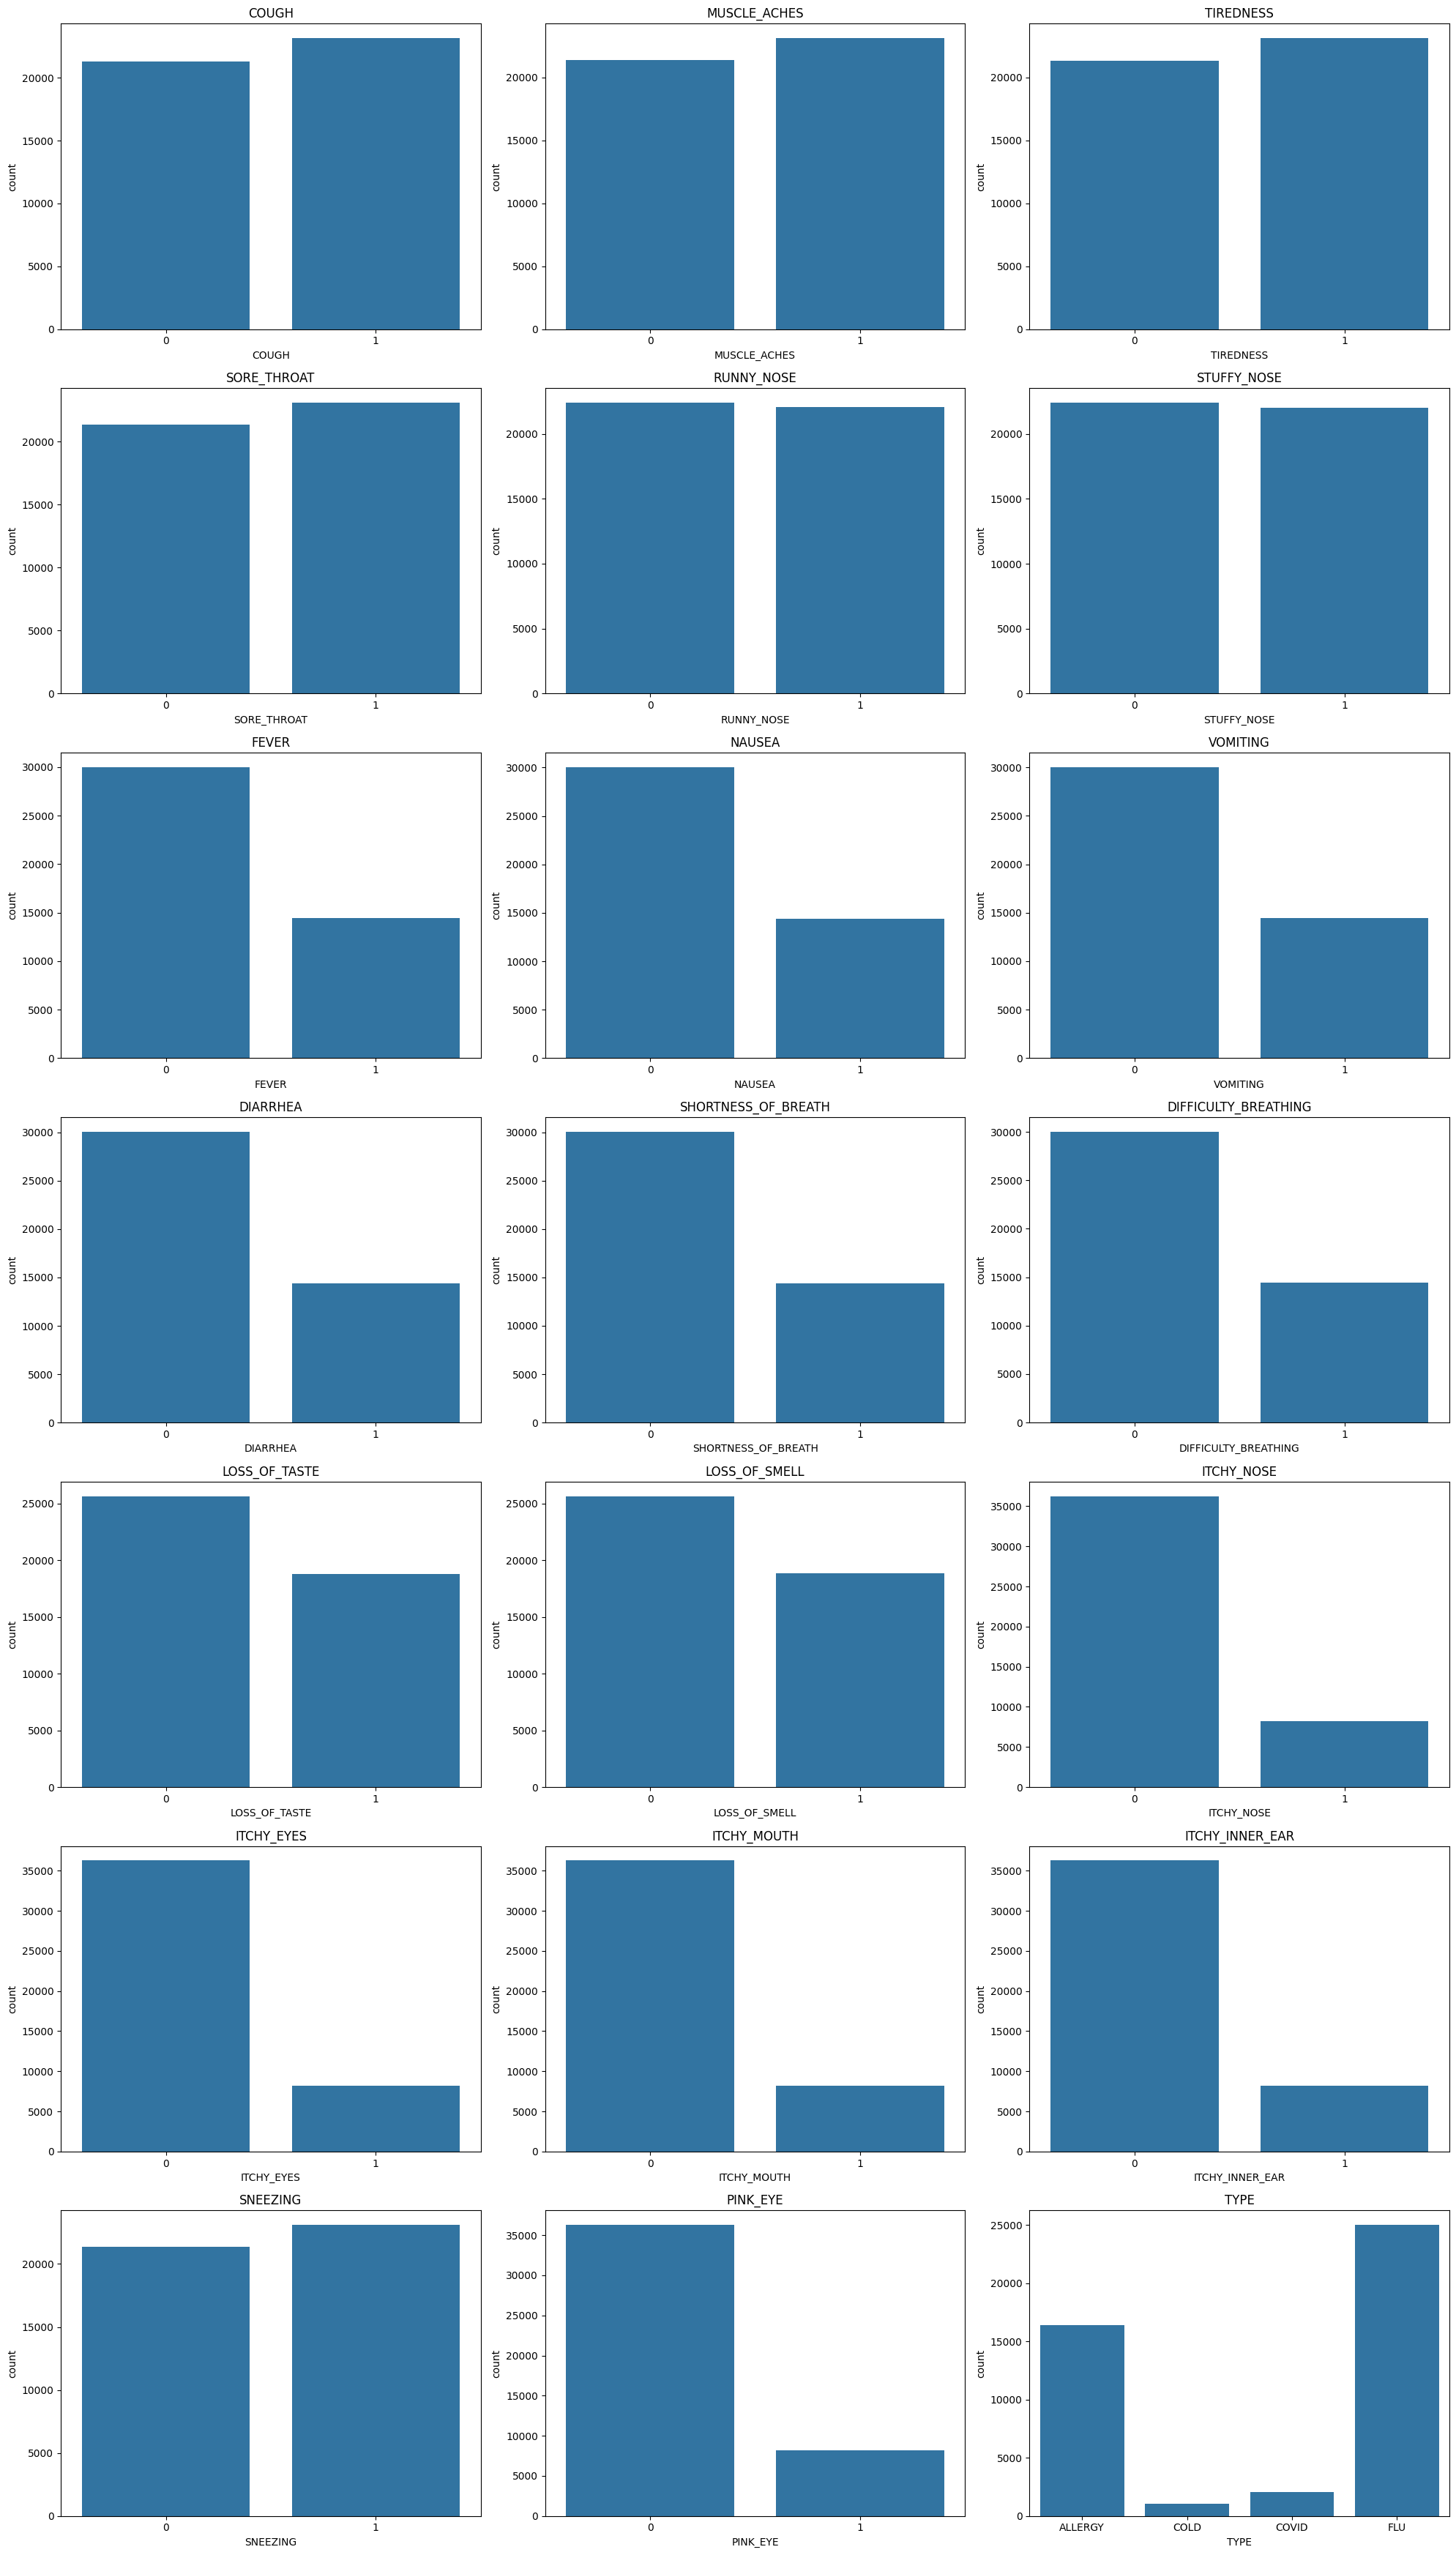

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cols = df.columns
num_cols = len(cols)
nrows = np.ceil(num_cols/3).astype(int)

fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20,5*nrows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## correlation map

In [18]:
df

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [20]:

df = df.drop(columns='TYPE')




In [21]:
df_corr = df.corr()
df_corr

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
COUGH,1.000000,-0.006751,-0.006131,-0.006357,-0.004079,-0.005263,0.013227,0.011657,0.010091,0.011686,0.011211,0.009665,0.023971,0.020439,-0.019659,-0.019659,-0.019659,-0.019659,-0.007885,-0.019656
MUSCLE_ACHES,-0.006751,1.000000,-0.005879,-0.005115,-0.004903,-0.004737,0.013419,0.009344,0.011051,0.009273,0.010917,0.005815,0.020134,0.020613,-0.018801,-0.018801,-0.018801,-0.018801,-0.004571,-0.018682
TIREDNESS,-0.006131,-0.005879,1.000000,-0.007378,-0.003460,-0.004285,0.012271,0.008773,0.009998,0.011203,0.012270,0.009956,0.019720,0.020929,-0.018930,-0.018930,-0.018930,-0.018930,-0.004401,-0.018927
SORE_THROAT,-0.006357,-0.005115,-0.007378,1.000000,-0.003828,-0.004744,0.012156,0.007886,0.009689,0.008196,0.010900,0.008877,0.022103,0.017297,-0.018415,-0.018415,-0.018415,-0.018415,-0.005801,-0.018529
RUNNY_NOSE,-0.004079,-0.004903,-0.003460,-0.003828,1.000000,0.041040,-0.007682,-0.005257,-0.008614,-0.004647,-0.008821,-0.006934,0.060959,0.060366,0.003582,0.003582,0.003582,0.003582,-0.004189,0.003698
STUFFY_NOSE,-0.005263,-0.004737,-0.004285,-0.004744,0.041040,1.000000,-0.005134,-0.006265,-0.008853,-0.009120,-0.008388,-0.007461,0.058063,0.059747,0.003946,0.003946,0.003946,0.003946,-0.002043,0.004061
FEVER,0.013227,0.013419,0.012271,0.012156,-0.007682,-0.005134,1.000000,0.280095,0.278506,0.277233,0.277221,0.279749,-0.050197,-0.049666,-0.330111,-0.330111,-0.330111,-0.330111,0.010489,-0.330062
NAUSEA,0.011657,0.009344,0.008773,0.007886,-0.005257,-0.006265,0.280095,1.000000,0.299449,0.301886,0.300841,0.303055,-0.041432,-0.040998,-0.329249,-0.329249,-0.329249,-0.329249,0.008333,-0.329200
VOMITING,0.010091,0.011051,0.009998,0.009689,-0.008614,-0.008853,0.278506,0.299449,1.000000,0.300497,0.300582,0.300948,-0.042111,-0.043136,-0.329452,-0.329452,-0.329452,-0.329452,0.009366,-0.329403
DIARRHEA,0.011686,0.009273,0.011203,0.008196,-0.004647,-0.009120,0.277233,0.301886,0.300497,1.000000,0.297675,0.301024,-0.042451,-0.044059,-0.328658,-0.328658,-0.328658,-0.328658,0.011435,-0.328609


<Axes: >

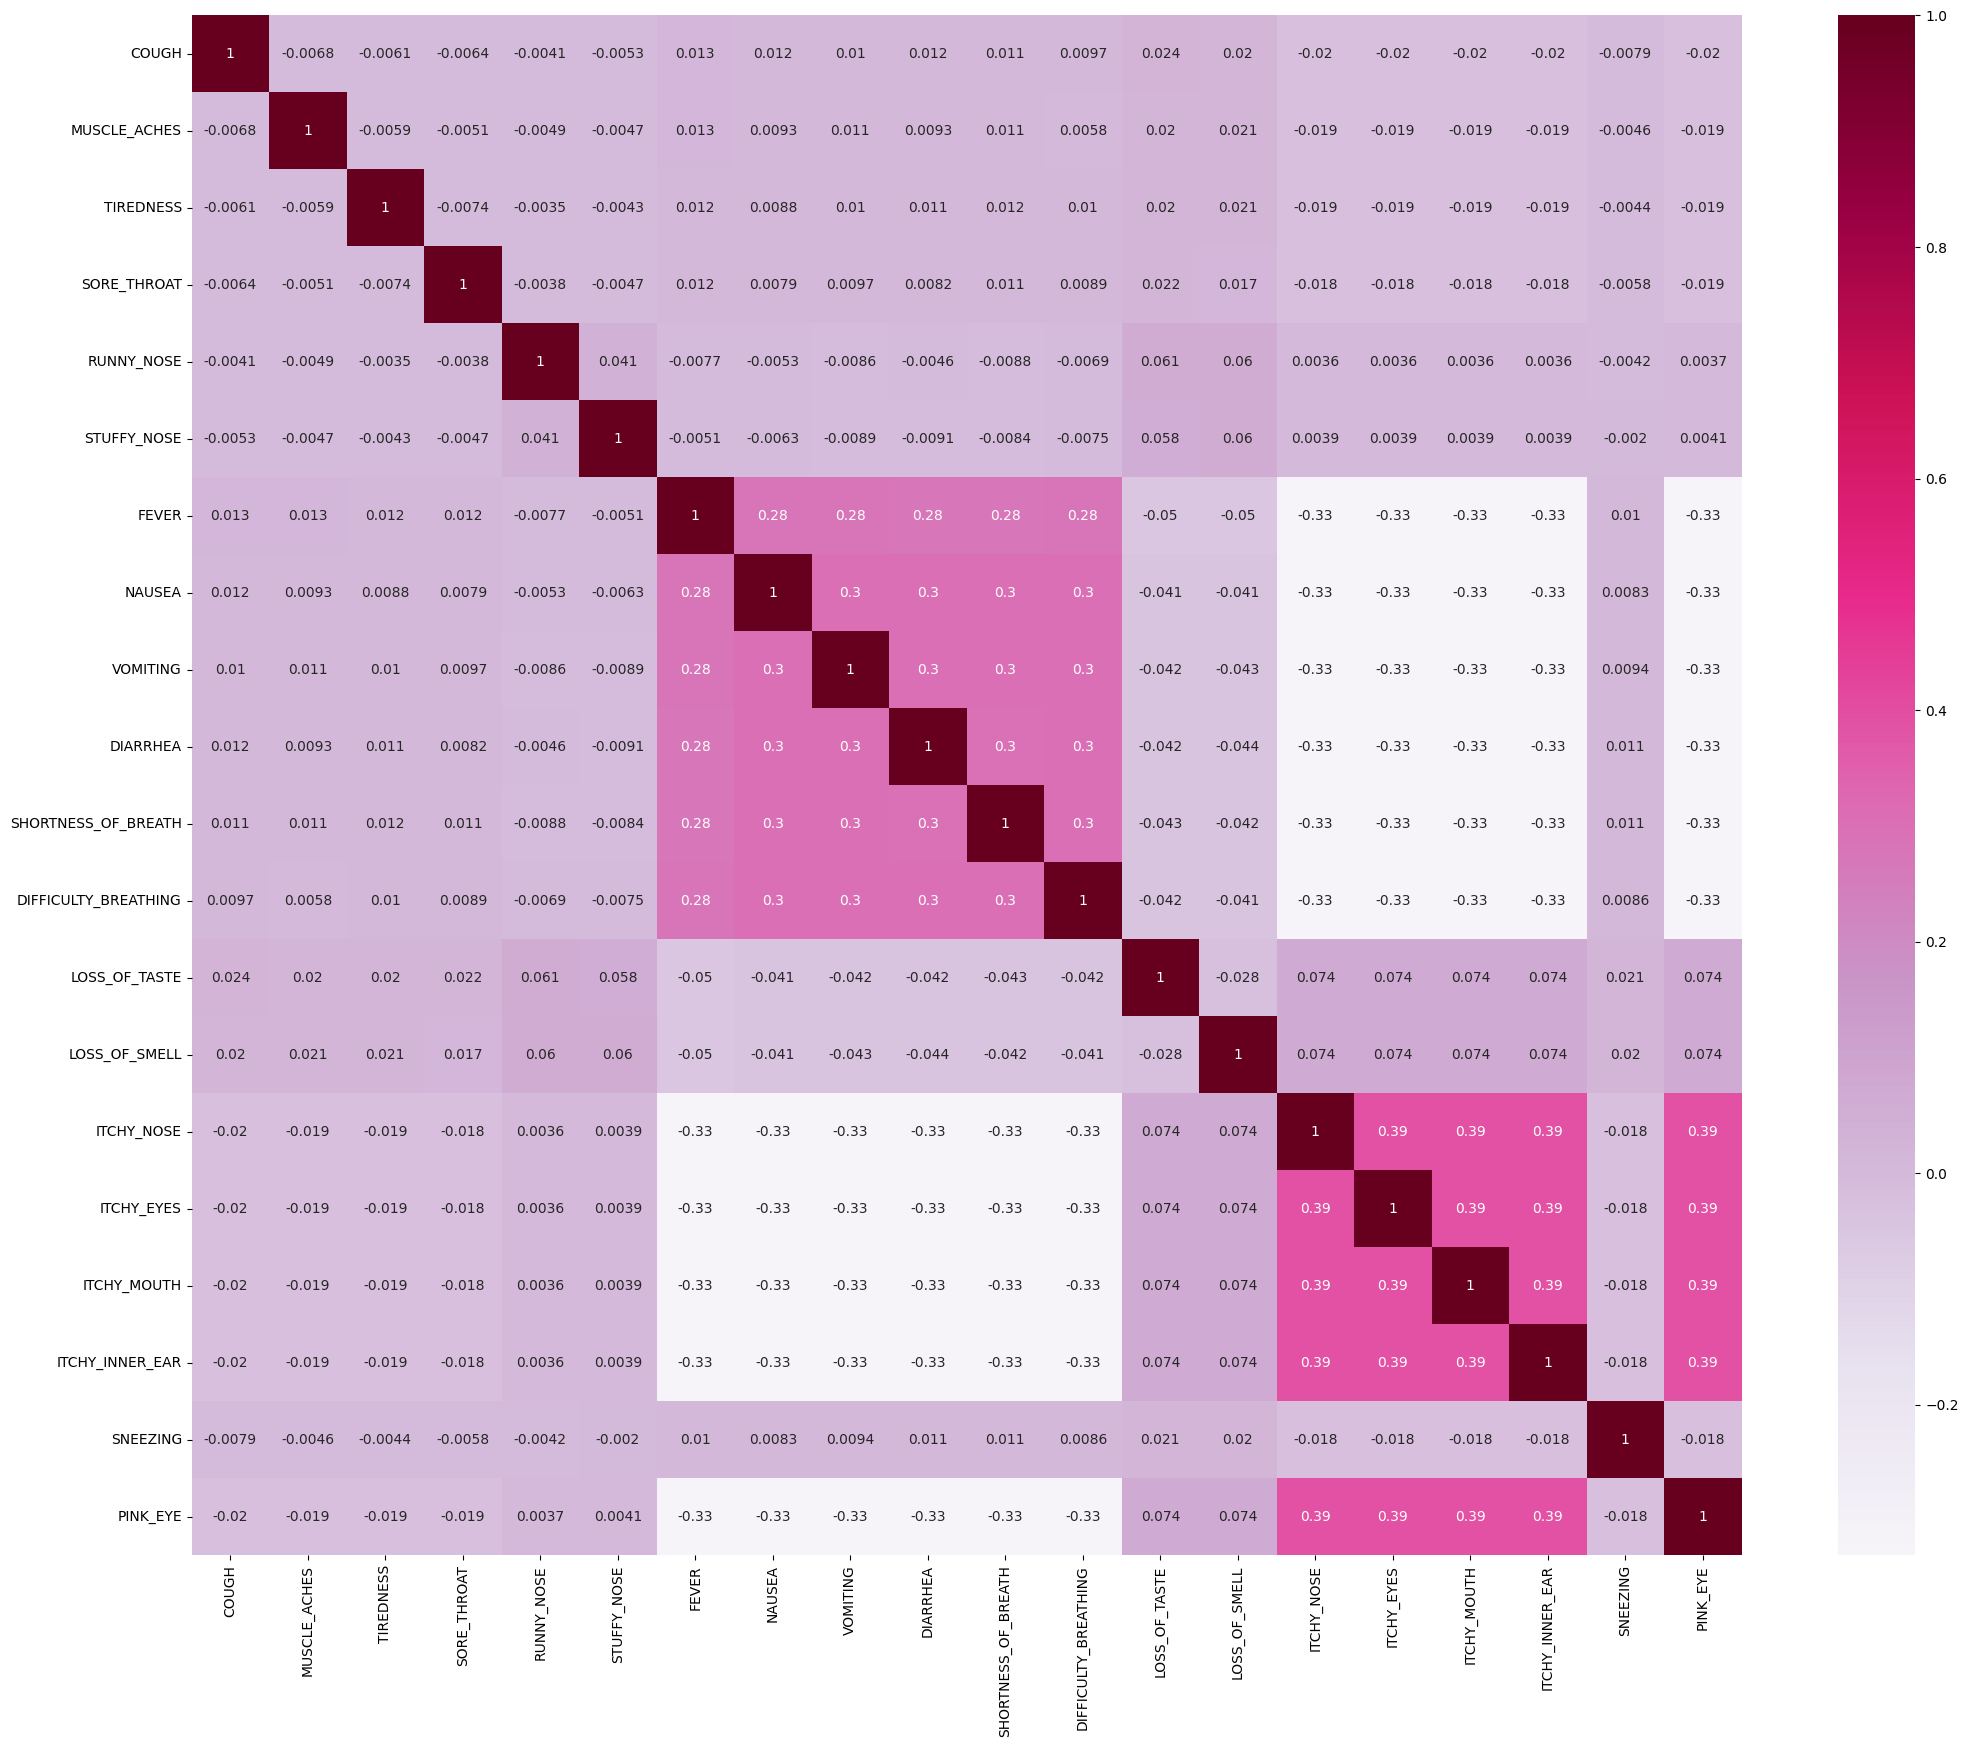

In [22]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="PuRd")

### dropping correlated feature

In [23]:
# By using this function we can select correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
col_corr = corr_features = correlation(df, 0.8)
print(col_corr)

set()


##  2. Splitting

In [30]:
df=pd.read_csv('/content/dataset.csv')

In [31]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
X

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1
2,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1
4,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
44449,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0
44450,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
44451,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [26]:
print(df.columns)

Index(['COUGH', 'MUSCLE_ACHES', 'TIREDNESS', 'SORE_THROAT', 'RUNNY_NOSE',
       'STUFFY_NOSE', 'FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING', 'LOSS_OF_TASTE',
       'LOSS_OF_SMELL', 'ITCHY_NOSE', 'ITCHY_EYES', 'ITCHY_MOUTH',
       'ITCHY_INNER_EAR', 'SNEEZING', 'PINK_EYE'],
      dtype='object')


In [33]:
y

0        ALLERGY
1        ALLERGY
2        ALLERGY
3        ALLERGY
4        ALLERGY
          ...   
44448        FLU
44449        FLU
44450        FLU
44451        FLU
44452        FLU
Name: TYPE, Length: 44453, dtype: object

In [34]:
from sklearn.model_selection import train_test_split

##### splitting train, test & validation `(Note: the validation is used for hyperparameter tuning)`

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

## 3. Building models (before solving the unbalanced data)

## hyperparamter tuning (manually)

In [36]:
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)

  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  print('')

The Training Accuracy for max_depth 1 is: 0.8617143381846564
The Validation Accuracy for max_depth 1 is: 0.8571122536418166

The Training Accuracy for max_depth 2 is: 0.9193333639410496
The Validation Accuracy for max_depth 2 is: 0.9148457583547558

The Training Accuracy for max_depth 3 is: 0.9193333639410496
The Validation Accuracy for max_depth 3 is: 0.9148457583547558

The Training Accuracy for max_depth 4 is: 0.9193333639410496
The Validation Accuracy for max_depth 4 is: 0.9148457583547558

The Training Accuracy for max_depth 5 is: 0.9193333639410496
The Validation Accuracy for max_depth 5 is: 0.9148457583547558

The Training Accuracy for max_depth 6 is: 0.9193333639410496
The Validation Accuracy for max_depth 6 is: 0.9148457583547558

The Training Accuracy for max_depth 7 is: 0.9193333639410496
The Validation Accuracy for max_depth 7 is: 0.9148457583547558

The Training Accuracy for max_depth 8 is: 0.9221339699738303
The Validation Accuracy for max_depth 8 is: 0.9167737789203085



In [37]:
print(max(train))
print(max(val))

0.9648317340801617
0.9258783204798628


In [38]:
print(min(train))
print(min(val))

0.8617143381846564
0.8571122536418166


## Plotting

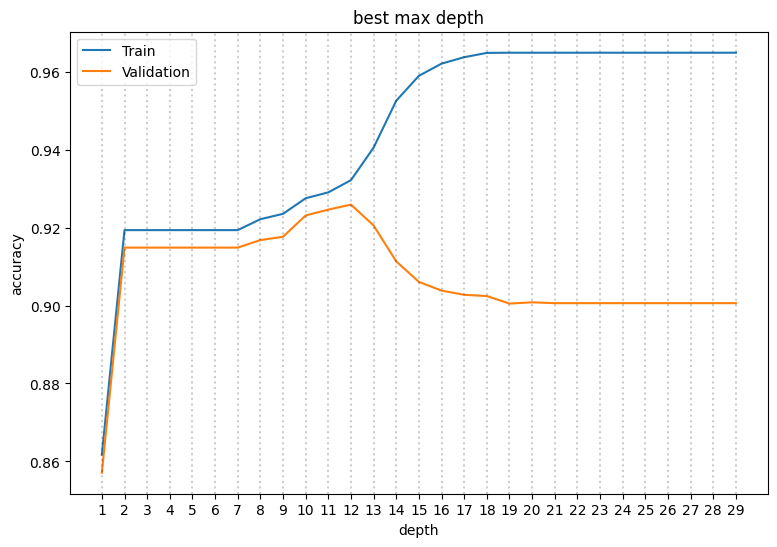

In [39]:
plt.figure(figsize=(9,6))
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")


# this for loop to draw vertical lines for each max depth
for i in nDepth:
    plt.axvline(
        x = i,
        ymin = 0,
        ymax = 1,
        linestyle = ':',
        alpha=0.2,
        color = 'black',)


# to show all max depth in x-axis
plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()


## building model with best depth *(from the plot)*

In [40]:
# as you can see after max depth = 12 the validation is decreasing "overfitting" so we use max depth 12
clf = RandomForestClassifier(max_depth=12)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)*100

93.28134373125376

### evaluating model

In [41]:
print(clf.score(X_train, y_train)) # how well the model is fitting the training data
print(clf.score(X_val, y_val)) # how well the model is generalizing to new, unseen data

0.9333823056792617
0.9251285347043702


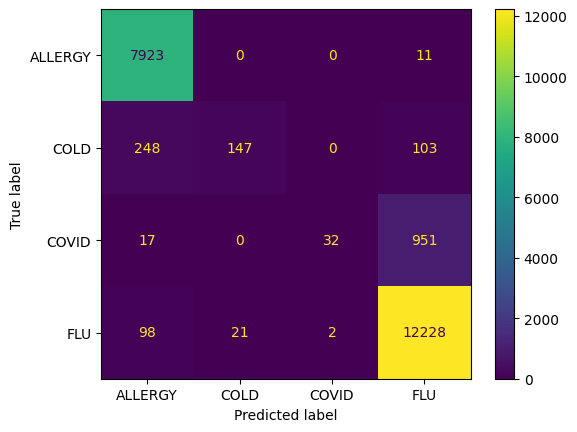

In [42]:
# confusion matrix for train data & the predicted data from train
# to see how well the model is fitting the training data
y_pred_train = clf.predict(X_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_pred_train)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

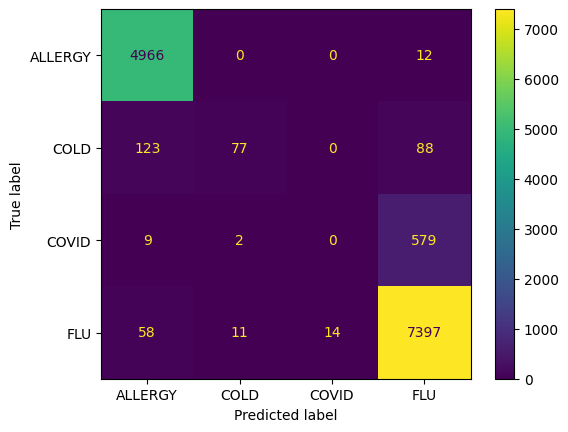

In [43]:
# confusion matrix for test data & the predicted data from testing
# how well the model is generalizing to new, unseen data
y_pred_test = clf.predict(X_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_test)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

In [44]:
# classification report for training data & the predicted data from training
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

     ALLERGY       0.96      1.00      0.98      7934
        COLD       0.88      0.30      0.44       498
       COVID       0.94      0.03      0.06      1000
         FLU       0.92      0.99      0.95     12349

    accuracy                           0.93     21781
   macro avg       0.92      0.58      0.61     21781
weighted avg       0.93      0.93      0.91     21781



In [45]:
#  classification report for test data & the predicted data from testing
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

     ALLERGY       0.96      1.00      0.98      4978
        COLD       0.86      0.27      0.41       288
       COVID       0.00      0.00      0.00       590
         FLU       0.92      0.99      0.95      7480

    accuracy                           0.93     13336
   macro avg       0.68      0.56      0.58     13336
weighted avg       0.89      0.93      0.91     13336



### `from the classification report and the confusion matrix the model performance in covid and cold is low as the data was unbalanced so we will decrese the number of data in ALLERGY & FLU`

## 4. Under Sampling ALLERGY & FLU

In [46]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## before undersampling


In [47]:
y.value_counts()

TYPE
FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: count, dtype: int64

<Axes: ylabel='count'>

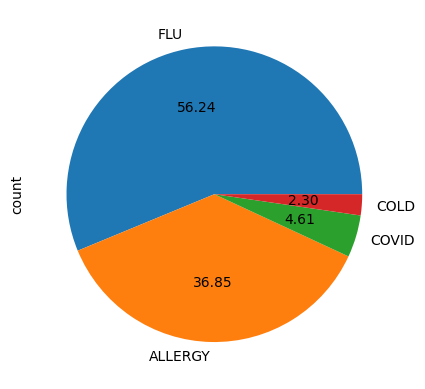

In [48]:
y.value_counts().plot.pie(autopct='%.2f')

## After undersampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler

In [50]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={"FLU": 7000,
                                                              "ALLERGY":7000})
X, y = rus.fit_resample(X, y)

<Axes: ylabel='count'>

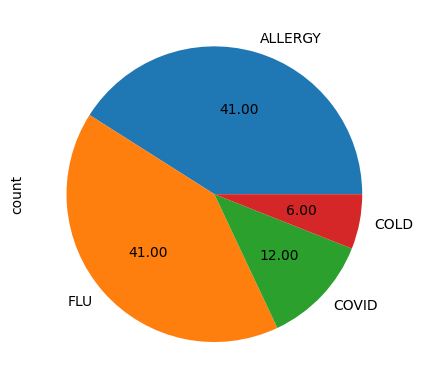

In [51]:
y.value_counts().plot.pie(autopct='%.2f')

#### `Now we will see how the model will perform after undersampling`

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

The Training Accuracy for max_depth 1 is: 0.8136282127913927
The Validation Accuracy for max_depth 1 is: 0.800836820083682

The Training Accuracy for max_depth 2 is: 0.8136282127913927
The Validation Accuracy for max_depth 2 is: 0.800836820083682

The Training Accuracy for max_depth 3 is: 0.8136282127913927
The Validation Accuracy for max_depth 3 is: 0.800836820083682

The Training Accuracy for max_depth 4 is: 0.8136282127913927
The Validation Accuracy for max_depth 4 is: 0.800836820083682

The Training Accuracy for max_depth 5 is: 0.8176927674835625
The Validation Accuracy for max_depth 5 is: 0.805299860529986

The Training Accuracy for max_depth 6 is: 0.8204423191870891
The Validation Accuracy for max_depth 6 is: 0.8066945606694561

The Training Accuracy for max_depth 7 is: 0.8810520023909145
The Validation Accuracy for max_depth 7 is: 0.8644351464435146

The Training Accuracy for max_depth 8 is: 0.9283921099820681
The Validation Accuracy for max_depth 8 is: 0.9280334728033472

The T

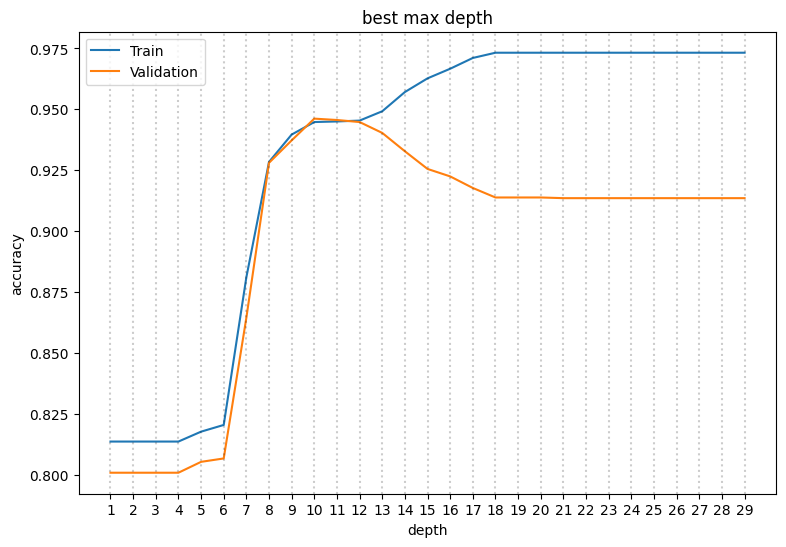

In [53]:
train = []
val = []
nDepth=np.arange(1,30)

for max_d in nDepth:
  model = RandomForestClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train, y_train)

  score_train = model.score(X_train, y_train)
  score_val = model.score(X_val,y_val)

  train.append(score_train)
  val.append(score_val)

  print(f'The Training Accuracy for max_depth {max_d} is: {score_train}')
  print(f'The Validation Accuracy for max_depth {max_d} is: {score_val}')
  print('')




## Plotting
plt.figure(figsize=(9,6))
plt.plot(nDepth,train,label='Train')
plt.plot(nDepth,val,label='Validation')

plt.title("best max depth")
plt.xlabel("depth")
plt.ylabel("accuracy")


# this for loop to draw vertical lines for each max depth
for i in nDepth:
    plt.axvline(
        x = i,
        ymin = 0,
        ymax = 1,
        linestyle = ':',
        alpha=0.2,
        color = 'black',)


# to show all max depth in x-axis
plt.xticks(np.arange(min(nDepth), max(nDepth)+1, 1))

plt.legend()
plt.show()



In [54]:
# building model
# as you can see after max depth = 13 the validation is decreasing "overfitting" so we use max depth 12
clf = RandomForestClassifier(max_depth=12)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)
print()

##### evaluating model
print(clf.score(X_train, y_train)) # how well the model is fitting the training data
print(clf.score(X_val, y_val)) # how well the model is generalizing to new, unseen data

94.5529090199141

0.9451285116557083
0.9453277545327754


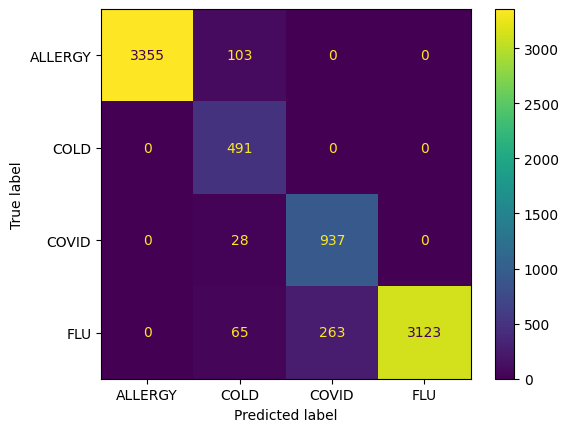

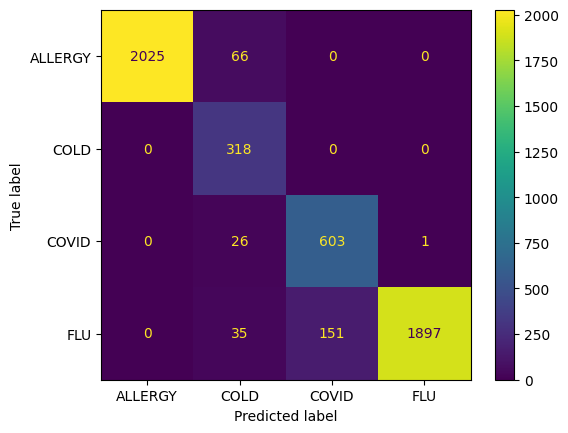

In [55]:
# evaluate how the model fit
y_pred_train = clf.predict(X_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train,y_pred_train)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

print()
print()

# evaluate how the model generalize
y_pred_test = clf.predict(X_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred_test)
                                    , display_labels=clf.classes_)
cm_display.plot()
plt.show()

In [56]:
# classification report for training data & the predicted data from training
print(classification_report(y_train,y_pred_train))

print()
print()

#  classification report for test data & the predicted data from testing
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      3458
        COLD       0.71      1.00      0.83       491
       COVID       0.78      0.97      0.87       965
         FLU       1.00      0.90      0.95      3451

    accuracy                           0.95      8365
   macro avg       0.87      0.96      0.91      8365
weighted avg       0.96      0.95      0.95      8365



              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.71      1.00      0.83       318
       COVID       0.80      0.96      0.87       630
         FLU       1.00      0.91      0.95      2083

    accuracy                           0.95      5122
   macro avg       0.88      0.96      0.91      5122
weighted avg       0.96      0.95      0.95      5122



### - `You can see that the model performance incresed after handling the unbalanced data`
### - `We used to build models and find the best hyperparameter manaully,`
### - `Now we will try to build different models and find best hyperparameter with gridSearch provided by sklearn `

## 5. Building different models (with grid search)  

In [57]:
from sklearn.model_selection import GridSearchCV
# gridsearch will try possible parameters and return the best

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### `Note we will split the data only to train and test no need for validation as we will use grid search for hyperparameter tuning and it splits the train data internaly to validation & train`

## RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
# parameters
param_grid = {
    'max_depth': np.arange(1,20),
    'n_estimators': np.arange(1,10),
    'criterion' : ["gini", "entropy", "log_loss"]
    # 'max_leaf_nodes': np.arange(1,51,5),
}
rf = RandomForestClassifier(random_state=42)

In [61]:
# fitting
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, verbose=3, return_train_score=True)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 513 candidates, totalling 2565 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.614, test=0.625) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.617, test=0.612) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.613, test=0.626) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.616, test=0.614) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=1;, score=(train=0.619, test=0.603) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=2;, score=(train=0.614, test=0.625) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=2;, score=(train=0.617, test=0.612) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=2;, score=(train=0.613, test=0.626) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=2

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             return_train_score=True, verbose=3)

In [64]:
# best params
print(f"Best Parameters: {grid_search_rf.best_params_} with best score {grid_search_rf.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 11, 'n_estimators': 9} with best score 0.9429288702928871


In [65]:
# predecting
y_pred = grid_search_rf.predict(X_test)

# evaluating
y_pred = grid_search_rf.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

94.5529090199141

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.72      0.94      0.82       318
       COVID       0.79      0.96      0.87       630
         FLU       0.99      0.91      0.95      2083

    accuracy                           0.94      5122
   macro avg       0.88      0.95      0.90      5122
weighted avg       0.95      0.94      0.95      5122



## DescisionTree

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
param_grid = {
    'max_depth': np.arange(1,20),
    'criterion' : ["gini", "entropy", "log_loss"]
}
dt = DecisionTreeClassifier(random_state=42)

In [67]:
grid_search_dt = GridSearchCV(dt,param_grid,
                                 cv=5,
                                 verbose=3,
                                 return_train_score=True)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 57 candidates, totalling 285 fits
[CV 1/5] END criterion=gini, max_depth=1;, score=(train=0.619, test=0.610) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1;, score=(train=0.617, test=0.619) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=1;, score=(train=0.620, test=0.607) total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=1;, score=(train=0.620, test=0.607) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=1;, score=(train=0.619, test=0.603) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2;, score=(train=0.721, test=0.718) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2;, score=(train=0.721, test=0.718) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2;, score=(train=0.722, test=0.716) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2;, score=(train=0.722, test=0.714) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2;, score=(train=0.723, test=0.712) total time=   0.0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True, verbose=3)

In [68]:
print(f"Best Parameters: {grid_search_dt.best_params_} with best score {grid_search_dt.best_score_}")

Best Parameters: {'criterion': 'gini', 'max_depth': 14} with best score 0.9451046025104602


In [69]:
y_pred = grid_search_dt.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

94.5529090199141

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.71      1.00      0.83       318
       COVID       0.80      0.96      0.87       630
         FLU       1.00      0.91      0.95      2083

    accuracy                           0.95      5122
   macro avg       0.88      0.96      0.91      5122
weighted avg       0.96      0.95      0.95      5122



## SVM


In [62]:
from sklearn.svm import SVC

In [70]:
mrange = np.arange(0.01, 0.11, 0.01)
mrange

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [71]:
param_grid = {
    'C': mrange,
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
}
svc = SVC(random_state=42)


In [72]:
grid_search_svc = GridSearchCV(svc, param_grid,
                                 cv=5,
                                 verbose=3,
                                 return_train_score=True,
                                 n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=3)

In [73]:
print(f"Best Parameters: {grid_search_svc.best_params_} with best score {grid_search_svc.best_score_}")

Best Parameters: {'C': 0.04, 'kernel': 'linear'} with best score 0.9446861924686193


In [74]:
y_pred = grid_search_svc.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

94.5529090199141

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.76      0.93      0.84       318
       COVID       0.78      1.00      0.88       630
         FLU       1.00      0.91      0.95      2083

    accuracy                           0.95      5122
   macro avg       0.88      0.95      0.91      5122
weighted avg       0.96      0.95      0.95      5122



## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
mrange = np.arange(0.1, 1.1, 0.1)
mrange

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [77]:
param_grid = {'C': mrange}
log = LogisticRegression(random_state=42)


In [78]:
grid_search_log = GridSearchCV(log, param_grid,
                                 cv=5,
                                 verbose=3,
                                 return_train_score=True)
grid_search_log.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........C=0.1;, score=(train=0.944, test=0.951) total time=   0.2s
[CV 2/5] END .........C=0.1;, score=(train=0.944, test=0.949) total time=   0.2s
[CV 3/5] END .........C=0.1;, score=(train=0.944, test=0.951) total time=   0.2s
[CV 4/5] END .........C=0.1;, score=(train=0.947, test=0.936) total time=   0.2s
[CV 5/5] END .........C=0.1;, score=(train=0.947, test=0.938) total time=   0.2s
[CV 1/5] END .........C=0.2;, score=(train=0.944, test=0.951) total time=   0.3s
[CV 2/5] END .........C=0.2;, score=(train=0.944, test=0.949) total time=   0.3s
[CV 3/5] END .........C=0.2;, score=(train=0.944, test=0.951) total time=   0.3s
[CV 4/5] END .........C=0.2;, score=(train=0.947, test=0.936) total time=   0.2s
[CV 5/5] END .........C=0.2;, score=(train=0.947, test=0.938) total time=   0.2s
[CV 1/5] END C=0.30000000000000004;, score=(train=0.944, test=0.951) total time=   0.3s
[CV 2/5] END C=0.30000000000000004;, scor

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END .........C=1.0;, score=(train=0.944, test=0.951) total time=   0.4s
[CV 2/5] END .........C=1.0;, score=(train=0.944, test=0.949) total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END .........C=1.0;, score=(train=0.944, test=0.949) total time=   0.4s
[CV 4/5] END .........C=1.0;, score=(train=0.947, test=0.936) total time=   0.4s
[CV 5/5] END .........C=1.0;, score=(train=0.947, test=0.937) total time=   0.3s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, verbose=3)

In [79]:
print(f"Best Parameters: {grid_search_log.best_params_} with best score {grid_search_log.best_score_}")
# Best Parameters: {'C': 0.9} with best score 0.9315487791578384

Best Parameters: {'C': 0.2} with best score 0.9449372384937238


In [80]:
y_pred = grid_search_log.predict(X_test)
accuracy_score(y_test,y_pred_test)*100
print()
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.72      0.98      0.83       318
       COVID       0.79      0.97      0.87       630
         FLU       1.00      0.91      0.95      2083

    accuracy                           0.95      5122
   macro avg       0.88      0.96      0.91      5122
weighted avg       0.96      0.95      0.95      5122



## Naive bayes

In [81]:
from sklearn.naive_bayes import CategoricalNB

In [82]:
mrange = np.arange(0.1, 1.1, 0.1)

In [83]:
C_nb = CategoricalNB()
param_grid = {
    'alpha': mrange
}

In [84]:
grid_search_C_nb = GridSearchCV(C_nb, param_grid,
                                 cv=5,
                                 verbose=3,
                                 return_train_score=True)
grid_search_C_nb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....alpha=0.1;, score=(train=0.944, test=0.950) total time=   0.1s
[CV 2/5] END .....alpha=0.1;, score=(train=0.945, test=0.948) total time=   0.1s
[CV 3/5] END .....alpha=0.1;, score=(train=0.944, test=0.950) total time=   0.1s
[CV 4/5] END .....alpha=0.1;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 5/5] END .....alpha=0.1;, score=(train=0.947, test=0.938) total time=   0.1s
[CV 1/5] END .....alpha=0.2;, score=(train=0.944, test=0.950) total time=   0.1s
[CV 2/5] END .....alpha=0.2;, score=(train=0.945, test=0.948) total time=   0.1s
[CV 3/5] END .....alpha=0.2;, score=(train=0.944, test=0.950) total time=   0.1s
[CV 4/5] END .....alpha=0.2;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 5/5] END .....alpha=0.2;, score=(train=0.947, test=0.938) total time=   0.0s
[CV 1/5] END alpha=0.30000000000000004;, score=(train=0.944, test=0.950) total time=   0.1s
[CV 2/5] END alpha=0.3000000000000000

GridSearchCV(cv=5, estimator=CategoricalNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, verbose=3)

In [85]:
print(f"Best Parameters: {grid_search_C_nb.best_params_} with best score {grid_search_C_nb.best_score_}")
# Best Parameters: {'alpha': 0.7000000000000001} with best score 0.9326414222551964

Best Parameters: {'alpha': 0.1} with best score 0.9448535564853557


In [86]:
y_pred = grid_search_C_nb.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)
print()
print(classification_report(y_test,y_pred))

94.5529090199141

              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      2091
        COLD       0.71      0.98      0.83       318
       COVID       0.79      0.96      0.87       630
         FLU       1.00      0.91      0.95      2083

    accuracy                           0.94      5122
   macro avg       0.88      0.96      0.91      5122
weighted avg       0.96      0.94      0.95      5122



## KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
mrange = np.arange(1,100,2)
mrange

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])

In [89]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': mrange,
}

In [90]:
grid_search_knn = GridSearchCV(knn, param_grid,
                                 cv=5,
                                 verbose=3,
                                 return_train_score=True,
                                 n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             return_train_score=True, verbose=3)

In [91]:
print(f"Best Parameters: {grid_search_knn.best_params_} with best score {grid_search_knn.best_score_}")

Best Parameters: {'n_neighbors': 59} with best score 0.9389958158995816


In [92]:
pd.DataFrame(grid_search_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032535,0.008233,0.739900,0.085350,1,{'n_neighbors': 1},0.824686,0.834310,0.829289,0.823013,...,0.826778,0.004452,50,0.968724,0.968724,0.968305,0.972803,0.971339,0.969979,0.001776
1,0.038719,0.014598,0.952403,0.157086,3,{'n_neighbors': 3},0.890795,0.895397,0.891632,0.879498,...,0.887950,0.005984,49,0.939226,0.935983,0.935879,0.937029,0.937657,0.937155,0.001230
2,0.033104,0.010940,0.859547,0.044860,5,{'n_neighbors': 5},0.905439,0.902510,0.904603,0.895397,...,0.900167,0.005074,48,0.935146,0.935251,0.935774,0.939226,0.939331,0.936946,0.001917
3,0.028337,0.001183,0.886136,0.074957,7,{'n_neighbors': 7},0.918828,0.913808,0.917992,0.902929,...,0.912134,0.006195,47,0.933682,0.936297,0.935042,0.940795,0.941213,0.937406,0.003055
4,0.027867,0.001230,1.007861,0.228228,9,{'n_neighbors': 9},0.926778,0.921339,0.922594,0.914644,...,0.918996,0.006096,46,0.934205,0.937866,0.935356,0.940063,0.942155,0.937929,0.002929
5,0.026961,0.001064,1.060487,0.263402,11,{'n_neighbors': 11},0.933054,0.926778,0.928870,0.920084,...,0.925356,0.005580,45,0.935565,0.937552,0.936820,0.939749,0.939540,0.937845,0.001602
6,0.030754,0.005653,1.056024,0.244468,13,{'n_neighbors': 13},0.931381,0.929707,0.932218,0.921339,...,0.927280,0.004751,44,0.937657,0.937866,0.937762,0.938912,0.939226,0.938285,0.000652
7,0.031555,0.008358,0.949373,0.217796,15,{'n_neighbors': 15},0.933891,0.930962,0.933054,0.924268,...,0.929205,0.004311,43,0.936611,0.938598,0.937762,0.939749,0.941632,0.938870,0.001721
8,0.027799,0.000229,0.910084,0.144988,17,{'n_neighbors': 17},0.938075,0.930962,0.935565,0.923431,...,0.930293,0.006049,42,0.938075,0.940272,0.937762,0.941213,0.942050,0.939874,0.001696
9,0.026140,0.001637,0.872511,0.032372,19,{'n_neighbors': 19},0.937657,0.934728,0.937238,0.927615,...,0.932720,0.004803,41,0.938285,0.940167,0.938703,0.941423,0.941632,0.940042,0.001366


In [93]:
acc = grid_search_knn.cv_results_['mean_test_score']
err_rate = 1 - acc
print(acc)
print()
print(err_rate)

[0.82677824 0.88794979 0.90016736 0.91213389 0.91899582 0.92535565
 0.92728033 0.92920502 0.93029289 0.93271967 0.93297071 0.93364017
 0.9339749  0.93514644 0.93472803 0.93539749 0.93615063 0.93682008
 0.93698745 0.93707113 0.93698745 0.93740586 0.9376569  0.93707113
 0.93782427 0.93782427 0.93790795 0.93866109 0.93874477 0.93899582
 0.93874477 0.93874477 0.93857741 0.93824268 0.93799163 0.93807531
 0.93782427 0.93757322 0.93748954 0.93707113 0.93723849 0.9367364
 0.93690377 0.93665272 0.9376569  0.93740586 0.93656904 0.93615063
 0.9358159  0.93497908]

[0.17322176 0.11205021 0.09983264 0.08786611 0.08100418 0.07464435
 0.07271967 0.07079498 0.06970711 0.06728033 0.06702929 0.06635983
 0.0660251  0.06485356 0.06527197 0.06460251 0.06384937 0.06317992
 0.06301255 0.06292887 0.06301255 0.06259414 0.0623431  0.06292887
 0.06217573 0.06217573 0.06209205 0.06133891 0.06125523 0.06100418
 0.06125523 0.06125523 0.06142259 0.06175732 0.06200837 0.06192469
 0.06217573 0.06242678 0.06251046 0.06

In [ ]:
# error_rate= []
# for i in range(1,60,2):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(X,y)
#     pred_i = knn.predict(X)

#     # error_rate.append(np.mean(pred_i != y))
#     # print(i,np.mean(pred_i != y))

#     err = 1 - accuracy_score(pred_i,y)
#     error_rate.append(err)
#     print(err)

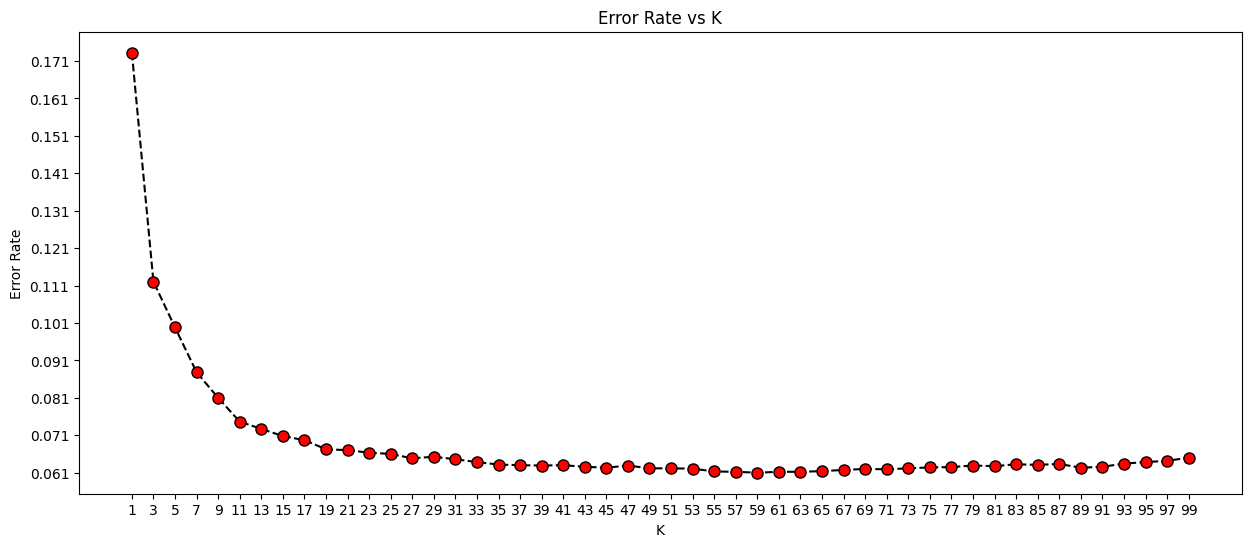

In [94]:
plt.figure(figsize = (15,6))
plt.plot(range(1,100,2),err_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.yticks(np.arange(min(err_rate), max(err_rate),0.01))
plt.xticks(np.arange(1, 100,2))
plt.show()

## 6. Best model

In [95]:
mdls_val_grid = {}
for clf in (grid_search_dt, grid_search_rf, grid_search_log,
            grid_search_C_nb, grid_search_knn, grid_search_svc):
            mdls_val_grid[clf.estimator.__class__.__name__] =  clf.best_score_


In [96]:
sorted_mdls_val = dict(sorted(mdls_val_grid.items(), key=lambda x: x[1], reverse=True))
sorted_mdls_val

{'DecisionTreeClassifier': 0.9451046025104602,
 'LogisticRegression': 0.9449372384937238,
 'CategoricalNB': 0.9448535564853557,
 'SVC': 0.9446861924686193,
 'RandomForestClassifier': 0.9429288702928871,
 'KNeighborsClassifier': 0.9389958158995816}

## plotting models

In [97]:
mdls = np.array(list(sorted_mdls_val.keys()))
mdls_val = np.array(list(sorted_mdls_val.values()))
print(mdls)
print()
print(mdls_val)

['DecisionTreeClassifier' 'LogisticRegression' 'CategoricalNB' 'SVC'
 'RandomForestClassifier' 'KNeighborsClassifier']

[0.9451046  0.94493724 0.94485356 0.94468619 0.94292887 0.93899582]


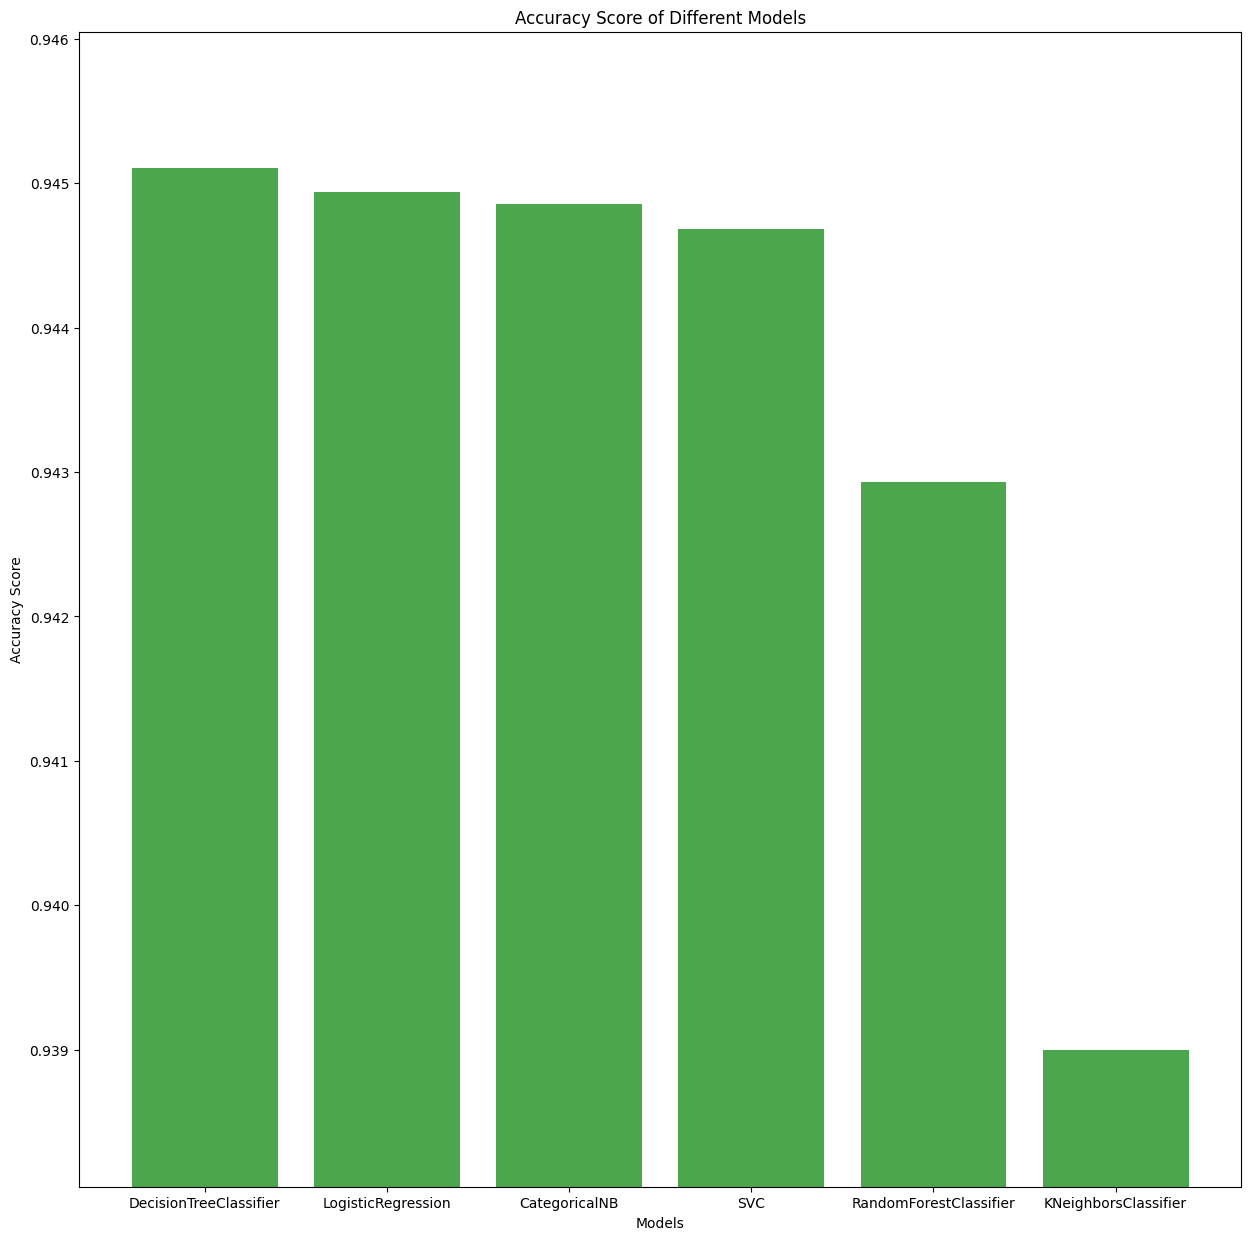

In [98]:
plt.figure(figsize = (15,15))
plt.bar(mdls, mdls_val, color='green', alpha=0.7)
# plt.bar(sorted_mdls_val.keys(), sorted_mdls_val.values())


plt.title("Accuracy Score of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

# plt.yticks(np.arange(0, 1, 0.02))
plt.ylim(bottom=min(mdls_val) - ((.1/100) * max(mdls_val)) , top=max(mdls_val) + ((.1/100) * max(mdls_val)) )
plt.show()

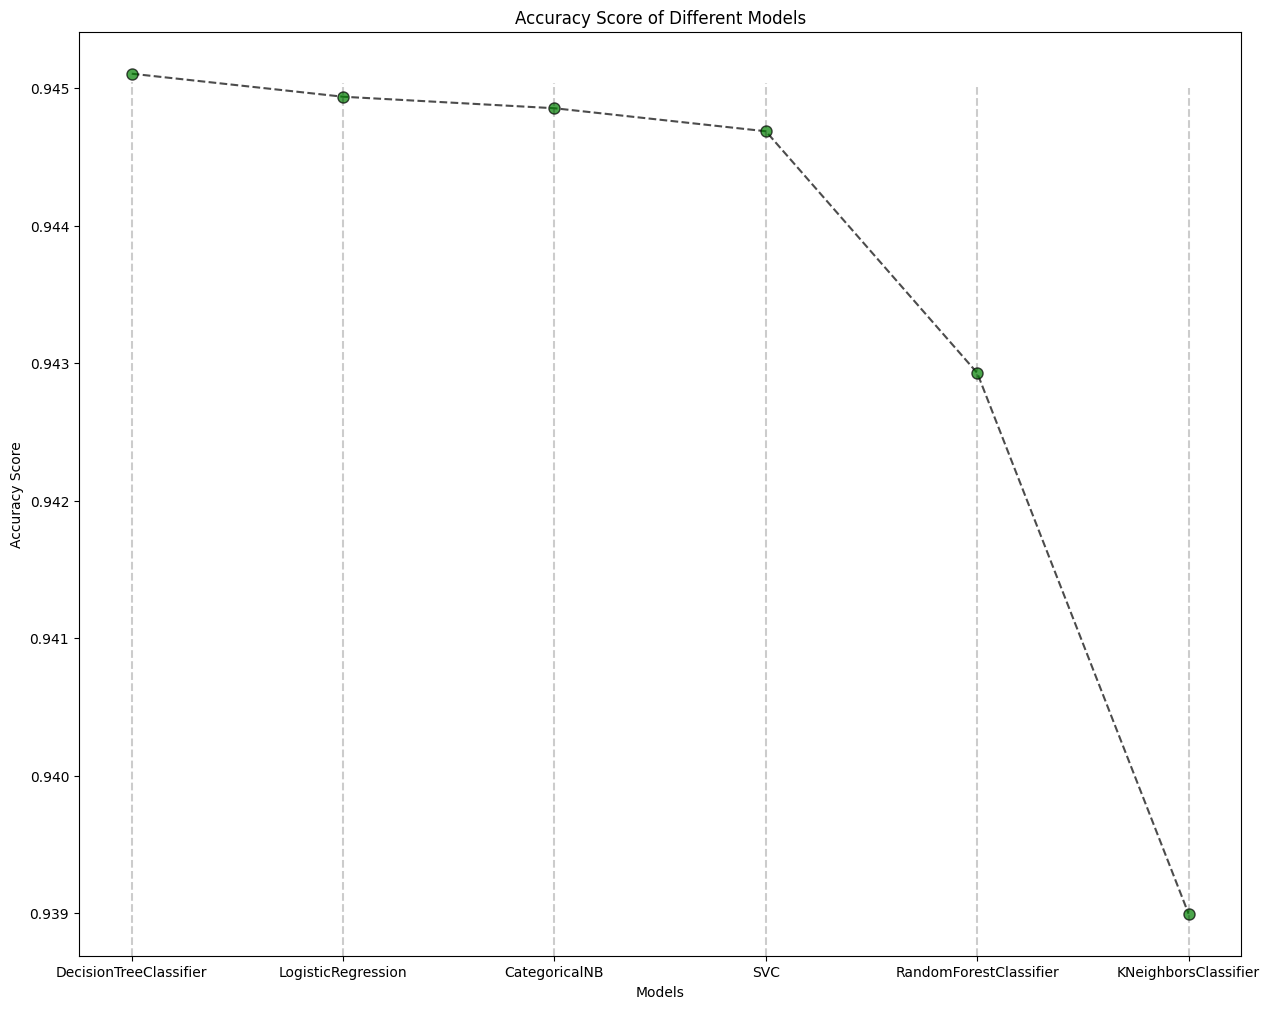

In [99]:
# plt.bar(mdls, mdls_val)
plt.figure(figsize = (15,12))

plt.plot(
    mdls,
    mdls_val,
    color = 'black',
    linestyle = '--',
    marker = 'o',markerfacecolor='green',
    markersize = 8,
    alpha=0.7,)



for mdl, val in zip(mdls, mdls_val):
    plt.axvline(
        x = mdl,
        ymin = 0,
        ymax = val,
        linestyle = '--',
        alpha=0.2,
        color = 'black',)


plt.title("Accuracy Score of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")

# plt.yticks(np.arange(0, 1, 0.02))
plt.show()